# The Sparks Foundation

## GRIP(Graduate Rotational Internship Program) November 2022

## Name :- Sairaj Kiran Waykool

### Domain:- Data Science & Business Analytics

##### Task 4 - Exploratory Data Analysis - Terrorism

#### Problem statement :

As a security/defense analyst, try to find out Hot zone of terrorism. What all security issues and insights, EDA can drive?

In [2]:
## importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [4]:
## reading the data
data=pd.read_csv('globalterrorismdb_0718dist.csv', encoding= 'latin-1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
data.shape

(181691, 135)

In [9]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
eventid,181691.0,2.002705e+11,1.325957e+09,1.970000e+11,1.991021e+11,2.009022e+11,2.014081e+11,2.017123e+11
iyear,181691.0,2.002639e+03,1.325943e+01,1.970000e+03,1.991000e+03,2.009000e+03,2.014000e+03,2.017000e+03
imonth,181691.0,6.467277e+00,3.388303e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
iday,181691.0,1.550564e+01,8.814045e+00,0.000000e+00,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
extended,181691.0,4.534622e-02,2.080629e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
...,...,...,...,...,...,...,...,...
nreleased,10400.0,-2.901827e+01,6.572012e+01,-9.900000e+01,-9.900000e+01,0.000000e+00,1.000000e+00,2.769000e+03
INT_LOG,181691.0,-4.543731e+00,4.543547e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,1.000000e+00
INT_IDEO,181691.0,-4.464398e+00,4.637152e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,1.000000e+00
INT_MISC,181691.0,9.000996e-02,5.684573e-01,-9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [11]:
data.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [12]:
#We'll only take some columns
data=data[["iyear","imonth","iday","country_txt","region_txt","success","city","attacktype1_txt","targtype1_txt",
       "gname","weaptype1_txt","nkill","nwound"]]
data.head()

,iyear,imonth,iday,country_txt,region_txt,success,city,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,1,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,1,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,1,Unknown,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,1,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,1,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN


In [13]:
## New column of Casualty
data["nkill"]=data["nkill"].fillna(0)
data["nwound"]=data["nwound"].fillna(0)
data["Casualty"]=data["nkill"] + data["nwound"] 

In [15]:
data.duplicated().sum()

14267

In [16]:
data.drop_duplicates(inplace = True)

In [17]:
data.duplicated().sum()


0

#### Visualization

In [18]:
#Number of attacks each year
Number_of_Attacks=data["iyear"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","iyear":"Attacks"}).set_index("Year")
Number_of_Attacks.head()

,Attacks
Year,
1970,612
1971,449
1972,488
1973,462
1974,532


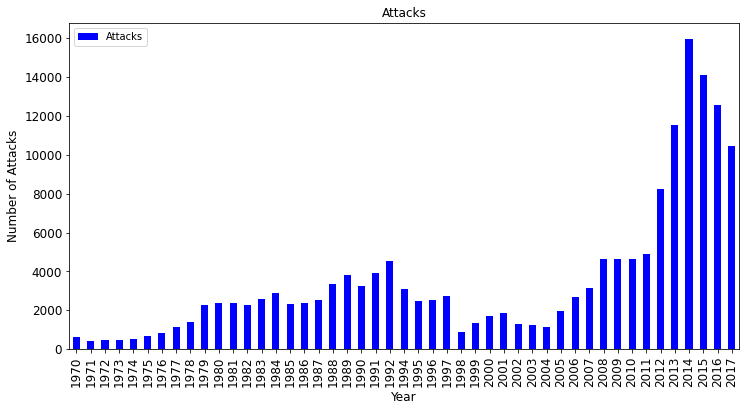

In [19]:
Number_of_Attacks.plot(kind="bar",color="blue",figsize=(12,6),fontsize=12)
plt.title("Attacks",fontsize=12)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Number of Attacks",fontsize=12)
plt.show()

#The most Attacks in 2014
#The least in 1971

In [20]:
#Number of killed in each year
Number_of_Killed=data[["iyear","nkill"]].groupby("iyear").sum()
Number_of_Killed.head()

,nkill
iyear,
1970,173.0
1971,172.0
1972,554.0
1973,366.0
1974,534.0


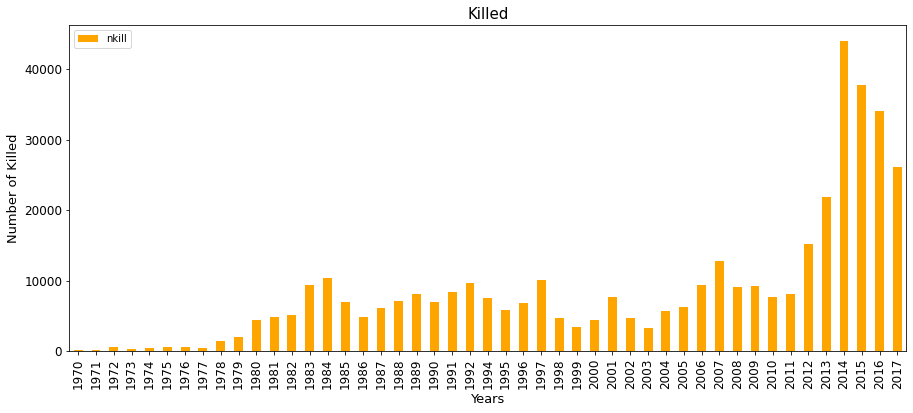

In [21]:
Number_of_Killed.plot(kind="bar",color="orange",figsize=(15,6),fontsize=12)
plt.title("Killed",fontsize=15)
plt.xlabel("Years",fontsize=13)
plt.ylabel("Number of Killed",fontsize=13)
plt.show()

#The most killed in 2014
#The least in 1970

In [22]:
#Number of Casualty in each year
Number_of_Casualty=data[["iyear","Casualty"]].groupby("iyear").sum()
Number_of_Casualty.head()

,Casualty
iyear,
1970,385.0
1971,254.0
1972,957.0
1973,861.0
1974,1398.0


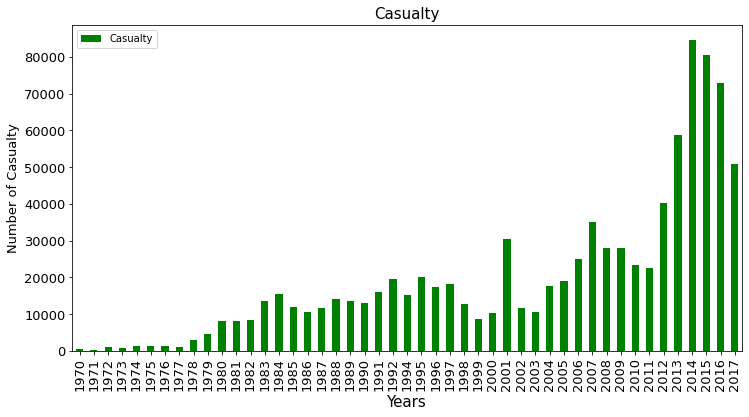

In [23]:
Number_of_Casualty.plot(kind="bar",color="green",figsize=(12,6),fontsize=13)
plt.title("Casualty",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Casualty",fontsize=13)
plt.show()

#The most killed in 2014
#The least in 1971

In [24]:
#Targert type in Casualty
target=data[["targtype1_txt","Casualty"]].groupby("targtype1_txt").sum().sort_values(by="Casualty",ascending=False)
target

,Casualty
targtype1_txt,
Private Citizens & Property,312995.0
Military,175240.0
Police,116835.0
Business,76507.0
Government (General),66268.0
Transportation,54017.0
Religious Figures/Institutions,37087.0
Terrorists/Non-State Militia,17141.0
Educational Institution,13636.0


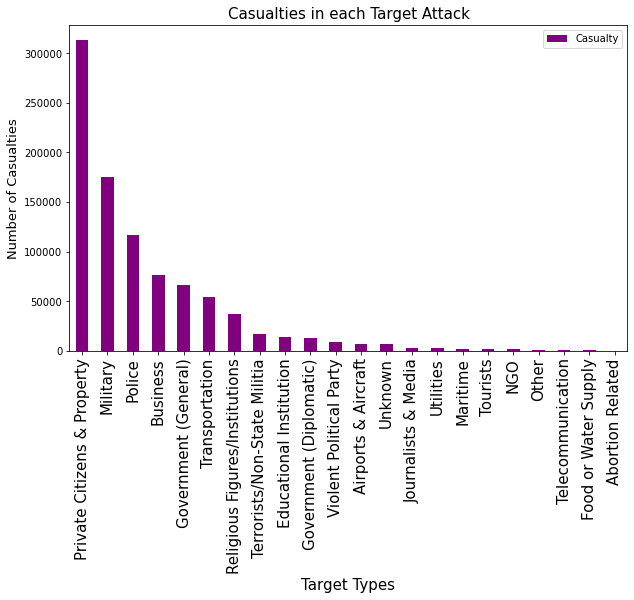

In [25]:
target.plot(kind="bar",color="purple",figsize=(10,6))
plt.title("Casualties in each Target Attack",fontsize=15)
plt.xlabel("Target Types",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [26]:
#Targert type in killed
target=data[["targtype1_txt","nkill"]].groupby("targtype1_txt").sum().sort_values(by="nkill",ascending=False)
target

,nkill
targtype1_txt,
Private Citizens & Property,137853.0
Military,104732.0
Police,52731.0
Government (General),25690.0
Business,23131.0
Transportation,13808.0
Religious Figures/Institutions,13190.0
Terrorists/Non-State Militia,8969.0
Unknown,3993.0


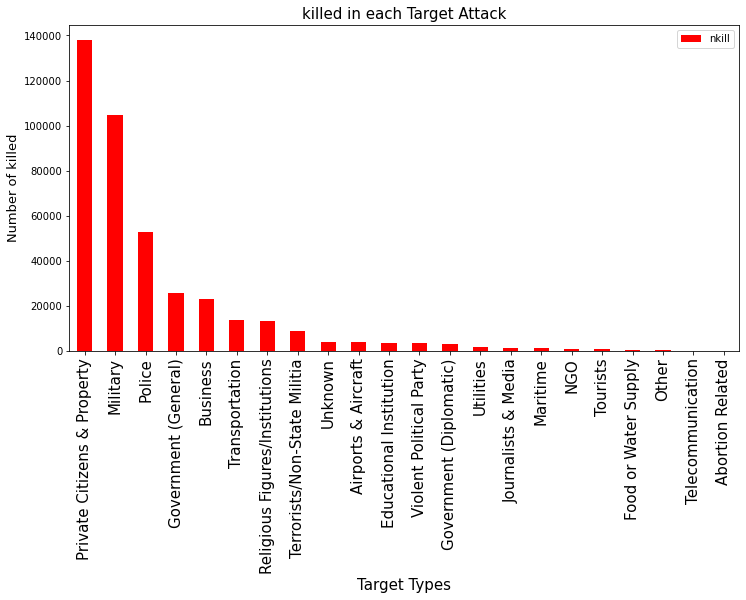

In [27]:
target.plot(kind="bar",color="red",figsize=(12,6))
plt.title("killed in each Target Attack",fontsize=15)
plt.xlabel("Target Types",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of killed",fontsize=13)
plt.show()

In [28]:
#Targert type in wounded
target=data[["targtype1_txt","nwound"]].groupby("targtype1_txt").sum().sort_values(by="nwound",ascending=False)
target

,nwound
targtype1_txt,
Private Citizens & Property,175142.0
Military,70508.0
Police,64104.0
Business,53376.0
Government (General),40578.0
Transportation,40209.0
Religious Figures/Institutions,23897.0
Government (Diplomatic),10226.0
Educational Institution,9967.0


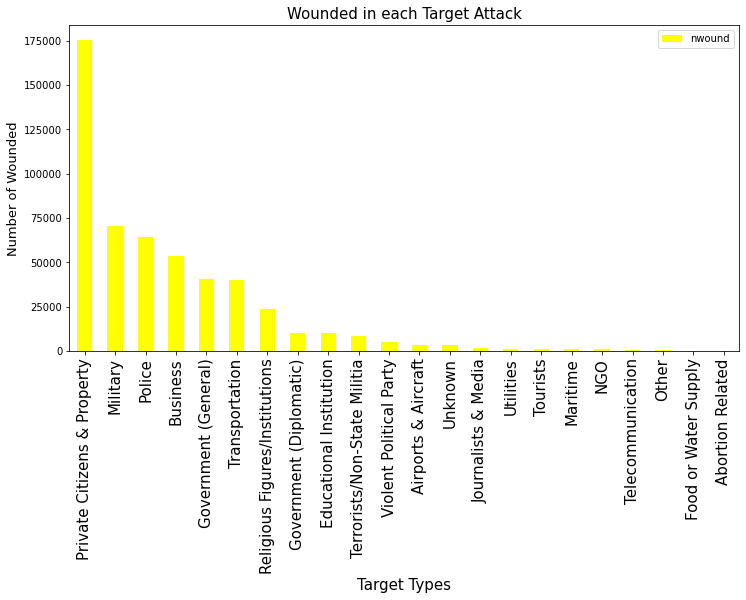

In [29]:
target.plot(kind="bar",color="yellow",figsize=(12,6))
plt.title("Wounded in each Target Attack",fontsize=15)
plt.xlabel("Target Types",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of Wounded",fontsize=13)
plt.show()

<AxesSubplot:title={'center':'Attacks'}, xlabel='country_txt', ylabel='count'>

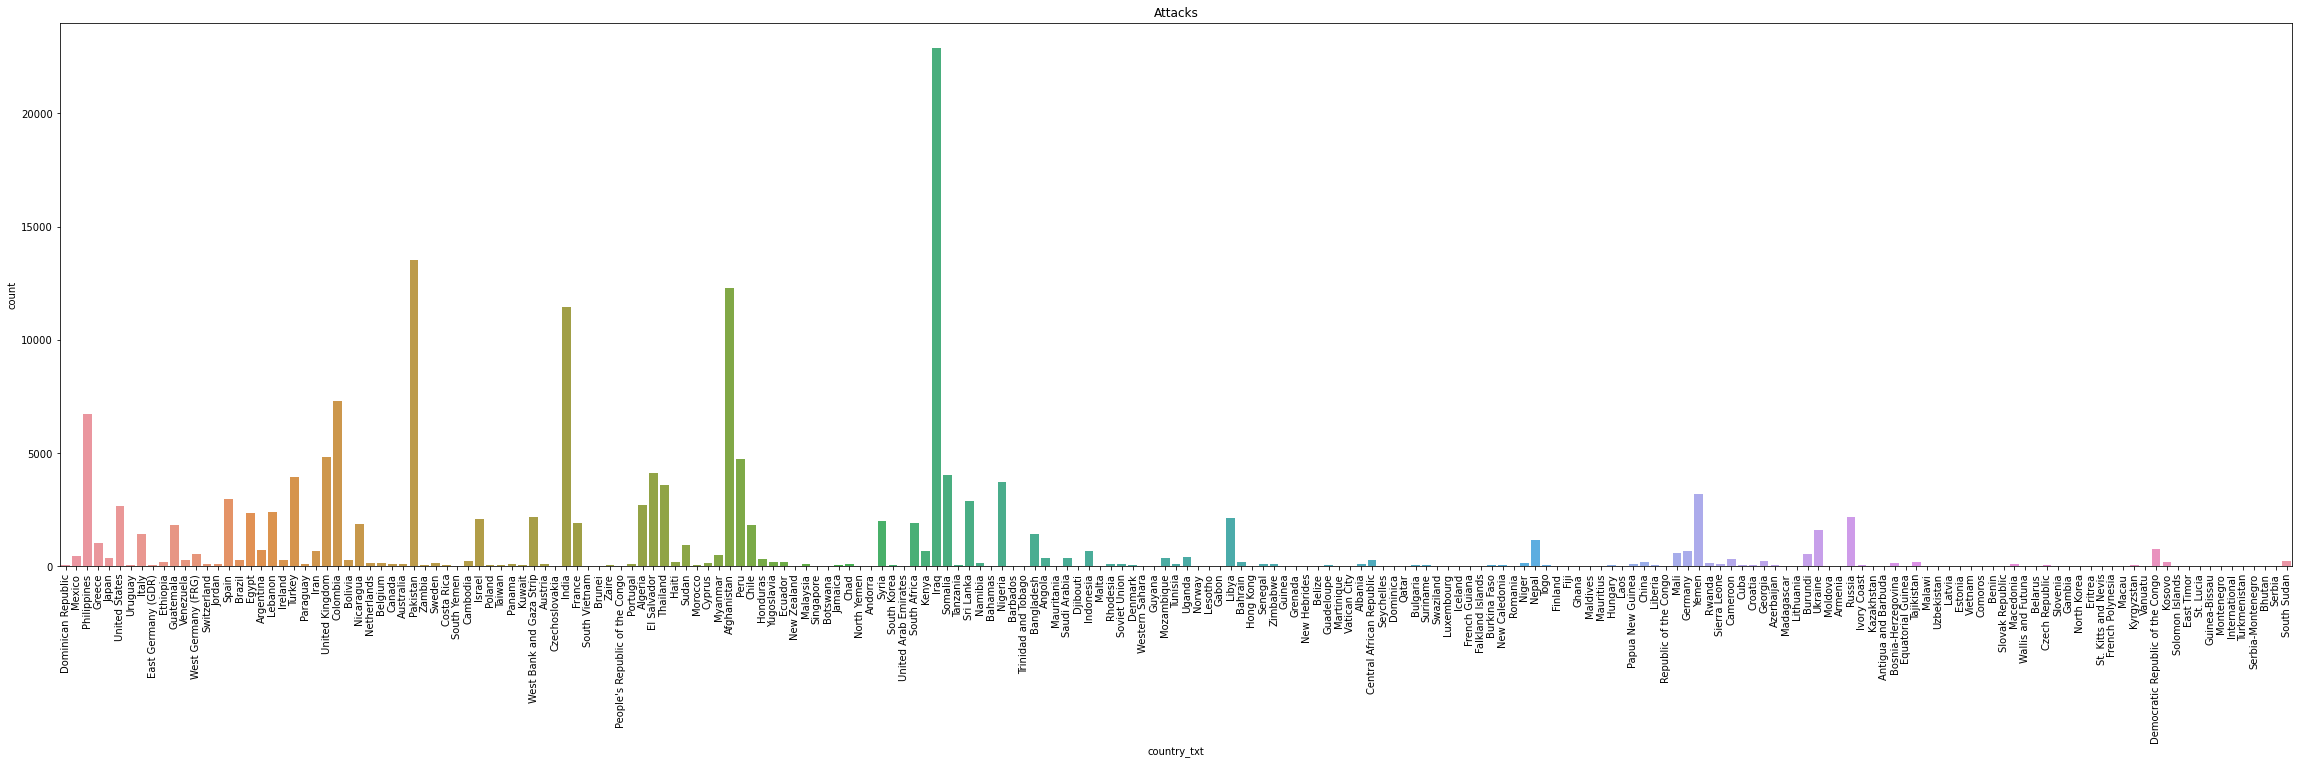

In [30]:
plt.figure(figsize=(40,10))
plt.xticks(rotation = 90)
plt.title('Attacks')
sns.countplot(x=data.country_txt)

<AxesSubplot:title={'center':'Attacks'}, xlabel='region_txt', ylabel='count'>

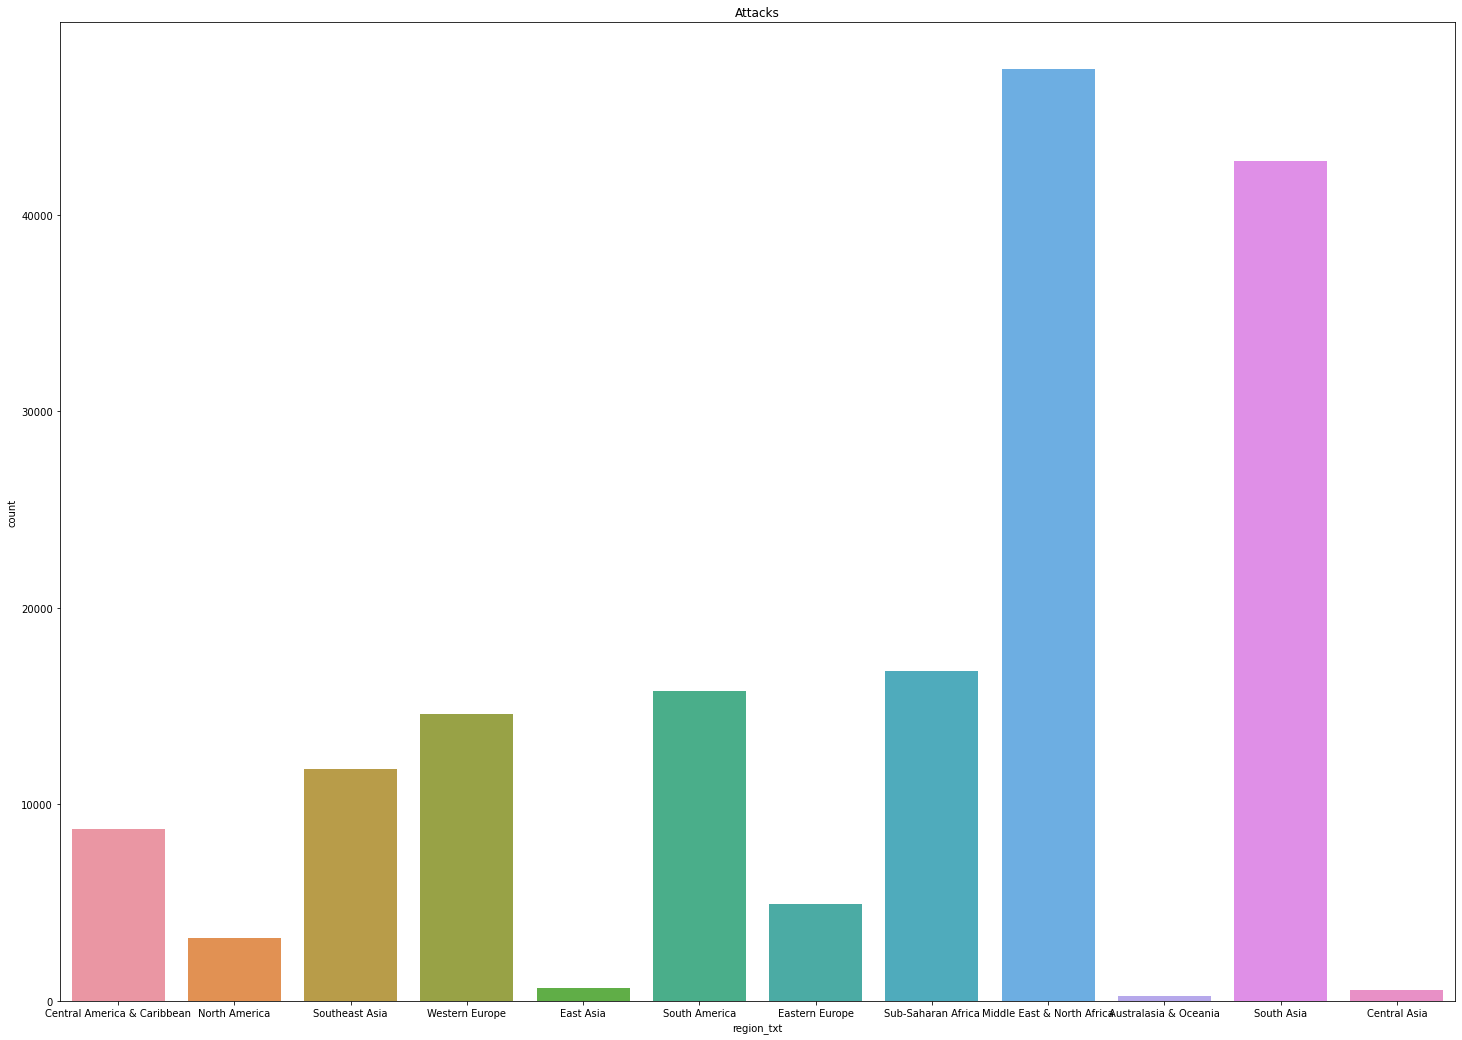

In [31]:
plt.figure(figsize=(25,18))
plt.title('Attacks')
sns.countplot(x=data.region_txt)

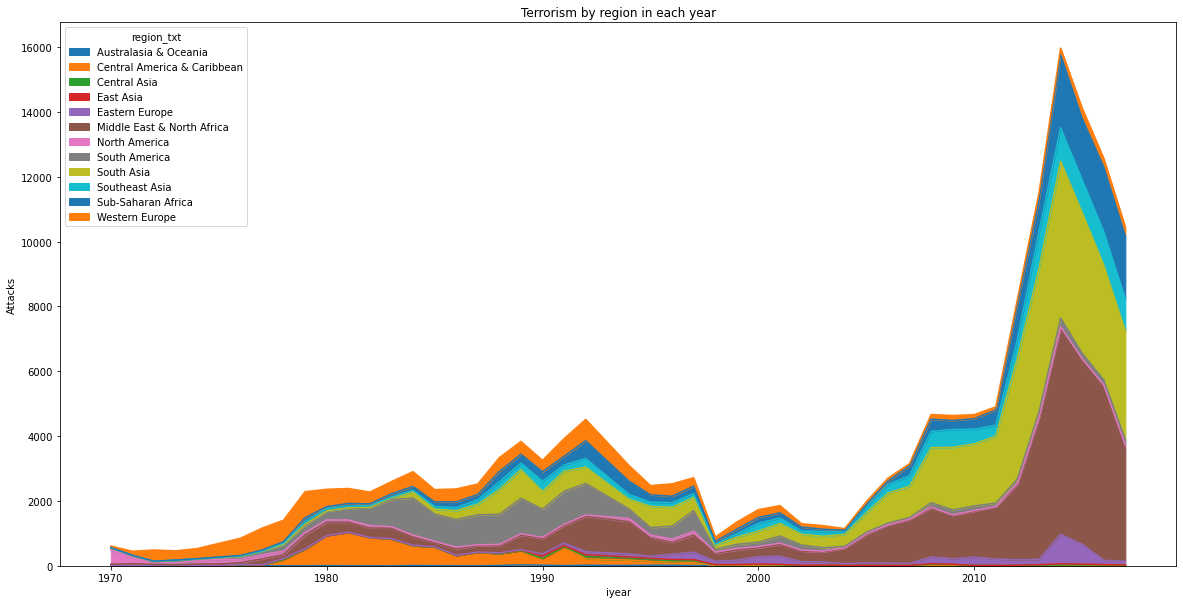

In [32]:
region=pd.crosstab(data.iyear,data.region_txt).plot(kind='area',figsize=(20,10))
plt.title('Terrorism by region in each year')
plt.ylabel('Attacks')
plt.show()

Text(0.5, 1.0, 'terrorism attacks over years')

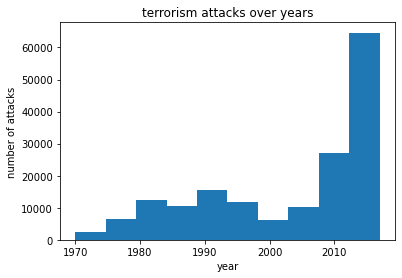

In [33]:
## Terrorism attacks over years
data['iyear'].plot.hist() 
plt.xlabel('year')
plt.ylabel('number of attacks')
plt.title('terrorism attacks over years')

Text(0.5, 1.0, 'No. of success and failure of terrorism attacks')

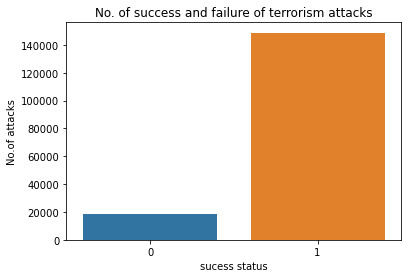

In [34]:
sns.countplot(x='success',data=data)
plt.xlabel('sucess status')
plt.ylabel('No.of attacks')
plt.title('No. of success and failure of terrorism attacks')

In [35]:
## Top 5 cities with highest terrorism attacks
data['city'].value_counts().nlargest(5)

Unknown    7795
Baghdad    7327
Karachi    2114
Mosul      2027
Belfast    1935
Name: city, dtype: int64

<AxesSubplot:>

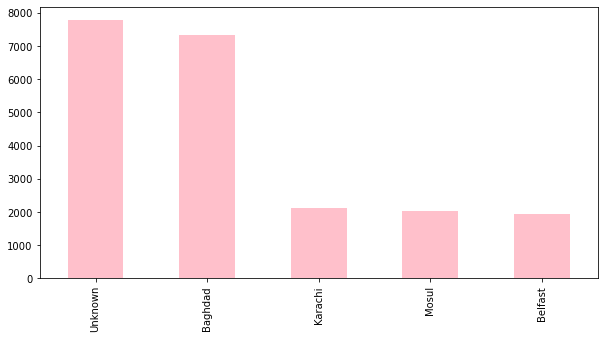

In [36]:
data['city'].value_counts().nlargest(5).plot(kind='bar', figsize=(10,5),color=['pink'])

#### Conclusion

The insights gathered from the dataset includes: Number of terrorism attacks were increases rapidly after 2010. Out of total terrorism attacks very few attacks were failed and almost all the terrorism attacks succeded. Top five cities with highest number of attacks are Baghdad,Karachi,Lima and Mosul. Compare to all the other countries number of terrorist attacks in Baghdad is very high.